# Australian Bushfires

## The Data - NASA

In MODIS (Moderate Resolution Imaging Spectroradiometer) each hotspot detection represents center of l km, meaning atleast one fire is located in less than 1km region.
VIIRS (Visible Infrared Imaging Radiometer Suite) has improved spatial resolution of 375m.

The measurement FRP(Fire radioactive power) can be used to detect fire.

The archive data is older and well calibrated. Whereas NRT(near real time) data is generated within just 3 hours of satellite detection. It is to support the immediate needs.

Inspiration

 - Which regions were the most affected?
 - Time line- Progress of Bush fire.
 - Visualization using of geo data on map - using folium, bokeh or plotly
 - can this dataset be integrated with other datasets to obtain insights?
 - Check out the starter-notebook to get started (data has been loaded).

In [45]:
!pip install h3

     |████████████████████████████████| 675 kB 5.1 MB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import folium
from h3 import h3


import os

In [4]:
os.listdir('raw_data')

['fire_archive_M6_101673.csv',
 'fire_nrt_V1_101674.csv',
 'fire_archive_V1_101674.csv',
 'fire_nrt_M6_101673.csv']

In [5]:
mod_df = pd.read_csv('raw_data/fire_archive_M6_101673.csv')
mod_df.shape

(148307, 15)

In [6]:
# about the data
# https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/v1-vnp14imgt#ed-viirs-375m-attributes

In [39]:
v_df = pd.read_csv('raw_data/fire_archive_V1_101674.csv')
v_df.shape

(105713, 14)

In [40]:
v_df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,type
0,-37.48861,149.63156,341.1,0.41,0.60,2019-09-01,304,N,VIIRS,n,1,293.7,4.4,0
1,-34.46110,150.88142,328.5,0.33,0.55,2019-09-01,305,N,VIIRS,l,1,298.5,2.1,2
2,-33.94823,151.21292,341.1,0.62,0.54,2019-09-01,305,N,VIIRS,n,1,295.3,6.4,0
3,-34.45618,150.87723,328.5,0.33,0.55,2019-09-01,305,N,VIIRS,n,1,298.1,2.1,2
4,-31.60223,150.15147,367.0,0.34,0.56,2019-09-01,306,N,VIIRS,h,1,302.4,19.3,0


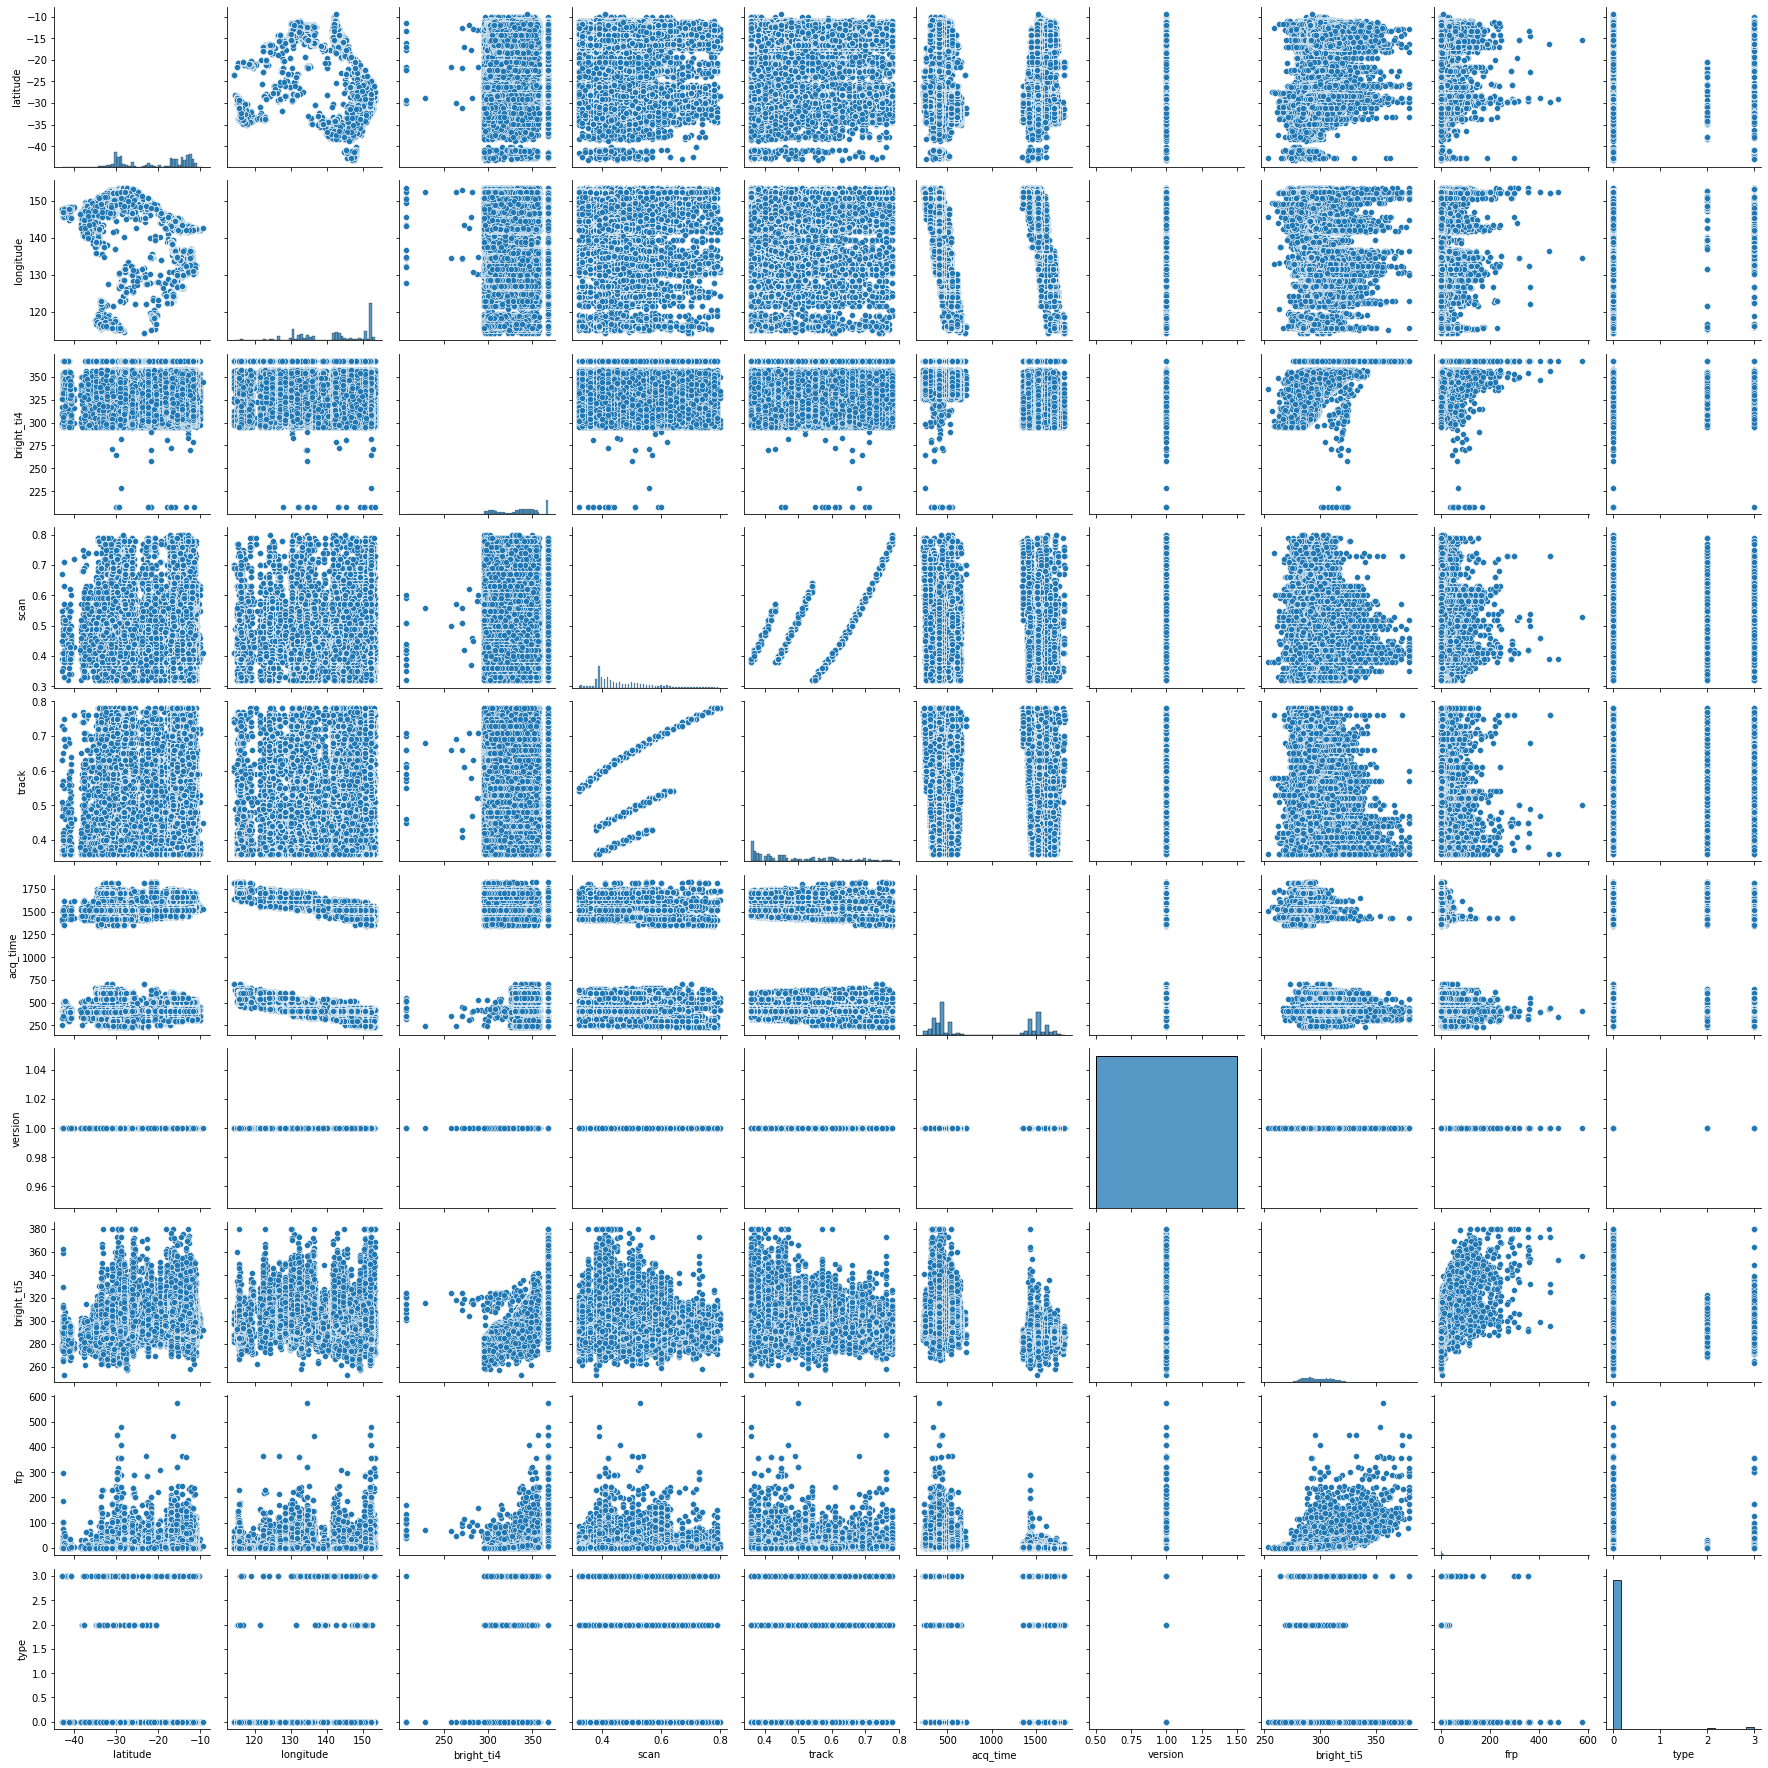

In [15]:
sns.pairplot(v_df)

In [41]:
mu_lat = np.mean(v_df.latitude)
mu_lon = np.mean(v_df.longitude)

In [42]:
v_df[0:]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,type
0,-37.48861,149.63156,341.1,0.41,0.60,2019-09-01,304,N,VIIRS,n,1,293.7,4.4,0
1,-34.46110,150.88142,328.5,0.33,0.55,2019-09-01,305,N,VIIRS,l,1,298.5,2.1,2
2,-33.94823,151.21292,341.1,0.62,0.54,2019-09-01,305,N,VIIRS,n,1,295.3,6.4,0
3,-34.45618,150.87723,328.5,0.33,0.55,2019-09-01,305,N,VIIRS,n,1,298.1,2.1,2
4,-31.60223,150.15147,367.0,0.34,0.56,2019-09-01,306,N,VIIRS,h,1,302.4,19.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105708,-32.14652,115.80019,296.8,0.49,0.41,2019-09-30,1702,N,VIIRS,n,1,285.9,0.9,2
105709,-32.37209,116.10032,296.1,0.48,0.40,2019-09-30,1702,N,VIIRS,n,1,284.8,1.2,0
105710,-33.12867,116.05993,300.1,0.47,0.40,2019-09-30,1702,N,VIIRS,n,1,283.9,0.9,0
105711,-32.36381,116.09719,298.1,0.48,0.40,2019-09-30,1702,N,VIIRS,n,1,284.9,0.8,0


### h3

In [9]:
h3.geo_to_h3(
    lat=-37.48861,
    lng=149.63156,
    resolution=7
)

'87be74c22ffffff'

In [10]:
h3_result = lambda id_str: h3.h3_get_resolution(id_str) if h3.h3_is_valid(id_str) else None
h3_result('8843a13687fffff')

8

### Folium

In [11]:
m = folium.Map(location=[mu_lat, mu_lon],
              zoom_start = 4,
              tiles = 'Stamen Terrain')

for index, row in v_df[:100].iterrows():
    folium.Circle(
        radius=100,
        location=[row['latitude'], row['longitude']],
        color="crimson",
        fill=False,
    ).add_to(m)

m

In [12]:
#WGS84

#-180.0000, -90.0000, 180.0000, 90.0000

In [ ]:
#predict data for times when it is missing

'03:05'

In [57]:
# deal with datetime data
# date
# time is supposed to be a string
    # add 0 to the beginning of any times with length 3
    # convert into datetime?

print(min(v_df['acq_time']), max(v_df['acq_time']))

v_df['acq_time'] = v_df['acq_time'].astype(str)

def format_time(x):
    
    if len(x) == 3:
        full_str = f"0{x}"
    else:
        full_str = x
        
    time_ls = list(full_str)
    time_ls.insert(2, ':')
    time_str = ''.join(ls)
    
    return time_str

v_df['acq_time'].apply(format_time)

1347 706


0         03:05
1         03:05
2         03:05
3         03:05
4         03:05
          ...  
105708    03:05
105709    03:05
105710    03:05
105711    03:05
105712    03:05
Name: acq_time, Length: 105713, dtype: object

In [ ]:
v_df['acq_time']

In [44]:
v_df.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence     object
version         int64
bright_ti5    float64
frp           float64
type            int64
dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

v_np = v_df[['latitude', 'longitude']].sample(1000).to_numpy()


pipe = Pipeline([
    ('scaler', StandardScaler())
])

v_z = pipe.fit_transform(v_np)

In [26]:
# create 3 features
# difference in angle between degrees around the world and degrees around the 24 clock
# but sa

In [ ]:
# get directions between points
# create a flow diagram / graph of the fires path
# 

In [31]:
# use genetic dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [29]:
links = linkage(v_z)

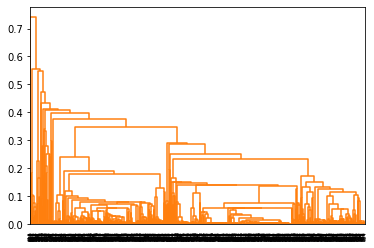

In [30]:
dn = dendrogram(links, color_threshold = 20)

In [36]:
fcluster(links, t = 0.05)

array([161, 351, 363,  26, 311, 225, 548, 476, 341, 136, 678, 121, 689,
       237, 202,  95, 189, 525,  40,  72, 187,  69, 251, 646, 422,  38,
        18, 575, 524,  34, 181, 631, 108, 241, 496, 218, 281, 306, 420,
       485,  49, 453,  88,  71, 348, 614, 263,  48, 592,  17,  31, 609,
       129, 677,  45, 503, 570, 314, 385, 350, 347, 628,  64, 458, 483,
       392, 248, 364, 407, 519, 159, 618, 481, 267, 468, 684, 243, 206,
       489, 513, 553, 633, 273, 671, 287, 535,  87, 657, 164,  93, 316,
       511, 607, 591, 110, 186, 133, 244, 610, 308, 664, 686, 309, 573,
       418, 285, 657, 340, 175, 139,  96, 427, 346, 290,  79, 645, 229,
       569, 215, 336, 282, 146, 264, 125, 637, 701, 491, 675, 582, 577,
       271, 274, 523,  80, 135, 480,  19,  12,  16, 606,  11, 368, 170,
        41, 693, 354, 135, 522, 195, 299, 108, 666, 665, 643, 193, 354,
       641, 647, 670, 375, 144, 173,  54, 300, 212, 451, 276, 165, 166,
       561, 581, 362, 595, 286,   1, 255, 272, 547, 332, 574, 42